# FFT from Pendulum Experiment
## Use zero padding to extend data

In [4]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

from numpy import genfromtxt
import cmath
import pandas as pd
import time, csv, os, requests
from scipy.fftpack import fft, ifft, fftfreq, fftshift

j = complex(0,1)

Running Python: 3.8.19
Running Sympy: 1.12.1


In [5]:
file_name = '/Users/jonathanhow/Documents/GitHub/16_002_Fall_2023/data/data_pdata5.csv'
data = genfromtxt(file_name, delimiter=' , ', comments='%')
print("Loaded local recorded data")

Loaded local recorded data


In [6]:
# remove some initial poor data
Nstart = 175
L1 = slice(Nstart,len(data)) # only use some of the data
L = len(data) - Nstart

t = (data[L1,0] - data[L1.start,0])/1e3
x1 = data[L1,1]/4500 # rescale
x1 -= np.mean(x1) # remove non-zero average

T = np.mean(np.diff(t))
Fs = 1/T

In [7]:
n = int(2**np.ceil(np.log2(L)))

X1 = fft(x1,n) # pad to n >= L pts and find FFT
X1_mag = np.abs(X1)/n # scaling
X1_mag_plot = fftshift(X1_mag) # find magnitude of FFT
f = fftfreq(n, 1/Fs)
f_plot = fftshift(f)

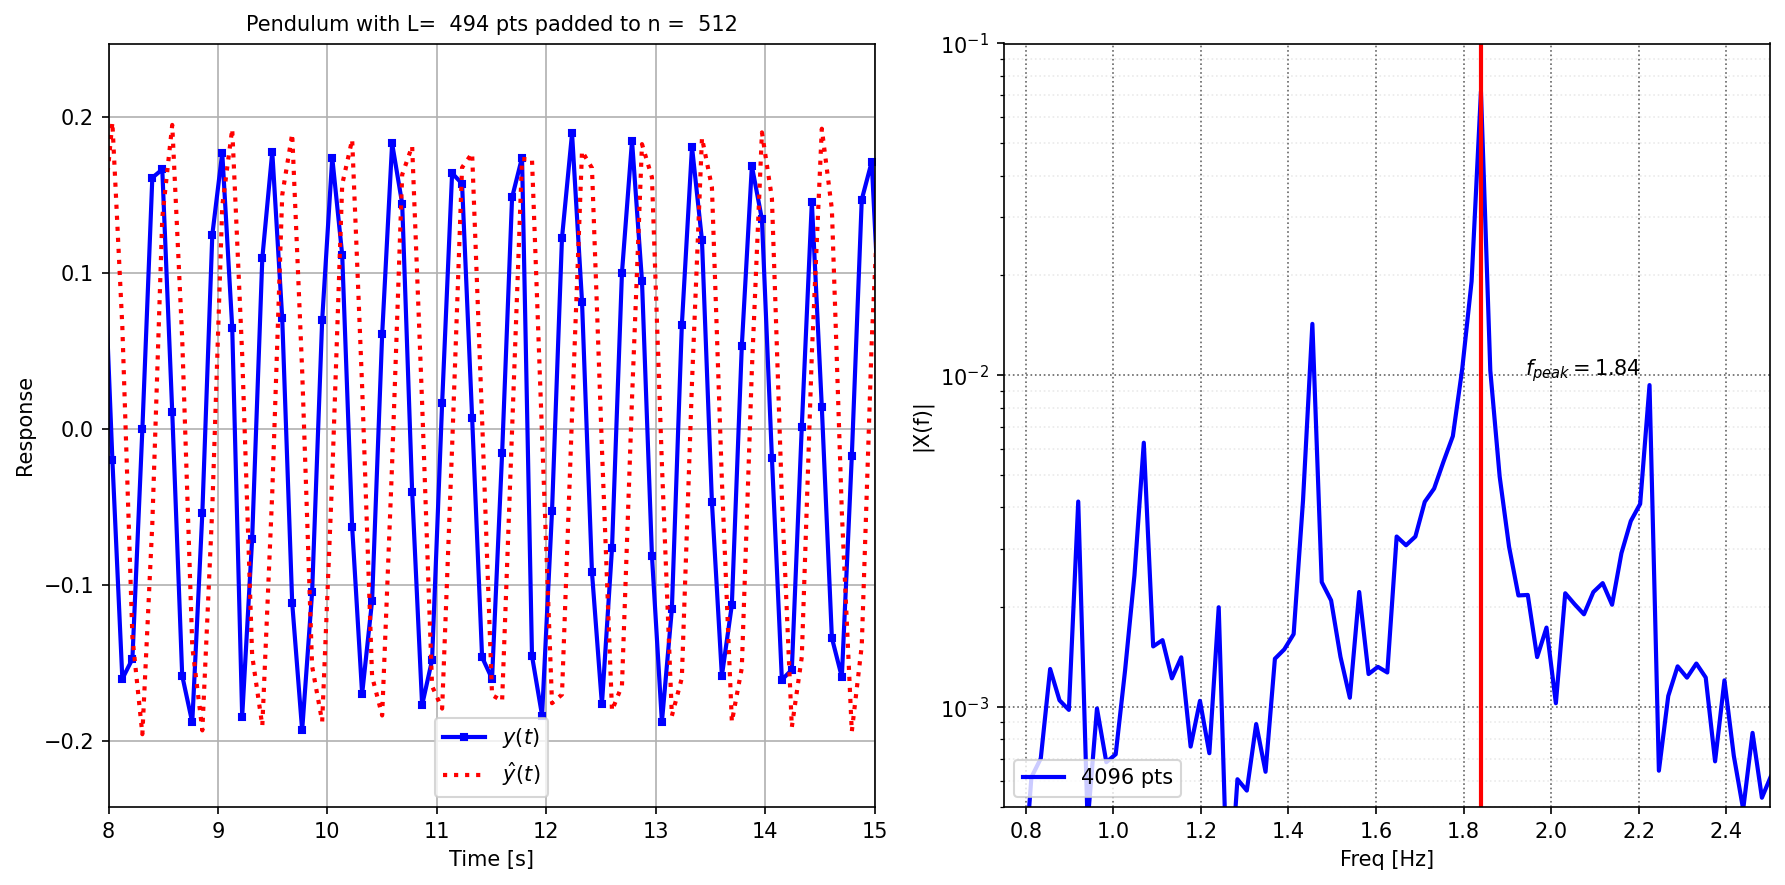

In [8]:
# Predictions based on observations
f_pred = 1.84
ph_pred = 0.99*np.pi
amp_pred = 0.2

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6), dpi=150)
ax1.plot(t,x1,'bs-',ms=3,label='$y(t)$')
ax1.plot(t,amp_pred*np.sin(2*np.pi*f_pred*t + ph_pred),'r:',label='$\hat y(t)$')
ax1.set_ylabel('Response')
ax1.set_xlabel('Time [s]')
ax1.legend()
ax1.set_title(f"Pendulum with {L= : 4d} pts padded to {n = :4d}")
ax1.set_xlim([8, 15])

f_peak = f[np.argmax(X1_mag)]
ax2.semilogy(f_plot, X1_mag_plot,'b-',label='4096 pts')
ax2.axvline(f_pred,color='r')
ax2.text(f_pred + 0.1,.01,'$f_{peak}=$'+str(np.round(f[np.argmax(X1_mag)],2)))
ax2.set_xlim([.75, 2.5])
ax2.set_ylim([5e-4, 0.1])
ax2.legend(loc=3)
ax2.set_xlabel('Freq [Hz]')
ax2.set_ylabel('|X(f)|')
nicegrid()
fig.savefig('./figs/T8_ex10_1.pdf',format='pdf', dpi=300)
plt.show()